# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2020 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

**1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?** 

In [2]:
# Volumen des Sees
V0 = 215e6      # m^3
# Öberfläche des Sees
A0 = 10e6       # m^2

# Tiefe des Sees nach den Formeln für einen geraden Kegel
z0 = 3*V0/A0    # m

# Querschnitt des Auslasses
A_out = 2       # m^2

# Ausgabe der Tiefe 
print('z0: {} m'.format(z0))

z0: 64.5 m


Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$

**2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ sowie den Volumenstrom $\dot{V_0}$ unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

Da: $u_{oben}=0$ und $z_{unten}=0$ ergibt sich für die anfangliche Strömungsgeschwindigkeit:
$$ u_{unten,0}=\sqrt{2\,g\,z_{oben}}$$

In [3]:
# Funktion zur Berechnung der Ausflussgeschwindigkeit in Abhängigkeit der Höhe
def Ausflussgeschwindigkeit(h):
    # Erdbeschleunigung
    g=9.81                 # m/s^2
    
    # Ausflussgeschwindigkeit
    U=(2*(g*h))**0.5       # m/s
    
    return U

# Berechnung der Ausflussgeschwindigkeit über definierte Funktion
U_unten_0 = Ausflussgeschwindigkeit(z0)
# Berechnung der Volumenstrom
V_dot_0 = U_unten_0 * A_out

# Ausgabe der Ergebnisse
print('Die Auslassgeschwindigkeit am Anfang des Ablasses ist {:.2f} m/s'.format(U_unten_0))
print('Dies für mit einem Auslassquerschnitt von {} m^2 zu einem Volumenstrom von {:.2f} m^3/s'.format(A_out,V_dot_0))

Die Auslassgeschwindigkeit am Anfang des Ablasses ist 35.57 m/s
Dies für mit einem Auslassquerschnitt von 2 m^2 zu einem Volumenstrom von 71.15 m^3/s


Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [4]:
# Importiere pi aus numpy
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
r0 = (A0/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


**3) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

In [5]:
def tiefe_kegel(V):
    # Fall Unterscheidung um gegenenfalls komplexe Wurzeln zu verhindern
    if V >= 0:
        # Berechnung der Tiefe über den Anfangsradius r0 und die Anfangstiefe z0
        return ((3 * V) / ((r0 / z0) ** 2 * pi)) ** (1/3)
    else:
        # Gleiche Berechnung, nur Minuszeichen vor die Wurzel gezogen
        return -((3 * -V) / ((r0 / z0) ** 2 * pi)) ** (1/3)

# Ausgabe für das Anfangsvolumen als Test 
print('Die Tiefe des kegelförmigen Sees mit einem Volumen von {:3.2e} m^3 beträgt {:.2f} m'.format(V0, tiefe_kegel(V0)))

Die Tiefe des kegelförmigen Sees mit einem Volumen von 2.15e+08 m^3 beträgt 64.50 m


**4) Schreiben Sie eine Funktion, die ausgehend von einem Startvolumen $V_0$ und einer gegebenen Zeitschrittweite $\Delta t$ den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt. Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.** *(Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.)*

In [6]:
# Funktion zur Berechnung des Abflusses in Abhängigkeit
# des Volumens,
# des Zeitschrittes
# und der spezifischen Abhängigkeit der Tiefe von der Form des Volumens als Funktion
def abfluss(V0, dt, height_func):
    # Startvolumen in Funktion definieren
    V = V0
    # Ausflussquerschnitt in Funktion definieren
    A_Auslass = 2                                       # m^2
    
    # Deklarierung der Ausgabe Listen mit Initialwerten
    t_list = [0]
    h_list = [height_func(V0)]
    
    # Solang der See nicht leer ist, dass heißt die Tiefe ist größer als Null,
    # nächsten Schritt berechnen. Aktuelle Tiefe ist der letzte Eintrag von h_list
    while h_list[-1] >= 0:
        # Berechnung der Ausflussgeschwindigkeit
        U_unten = Ausflussgeschwindigkeit(h_list[-1])    # m/s
        # Berechnung des Volumenstroms
        V_dot = U_unten*A_Auslass                       # m^3/s
        # Berechnung des neuen Volumens nach Zeitschritt dt 
        V = V - (V_dot * dt)
        
        # Neuen Werte an die Listen zur Ausgabe hängen.
        # Tiefe mit Hilfe der spezifischen Funktion berechnunen
        h_list.append(height_func(V))
        # Nächster Zeitpunkt ist letzter Zeitpunkt plus dt
        t_list.append(t_list[-1]+dt)
    
    return t_list, h_list

# Berechnung des Ausflusses mit unterschiedlichen dt
t_list_min, h_list_min = abfluss(V0, 60, tiefe_kegel)
t_list_day, h_list_day = abfluss(V0, 60*60*24*4, tiefe_kegel)

**5) Wie lange dauert es, bis der Stausee komplett abgelassen wurde? Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:**
  * $\Delta t_1$ = 1 Minute
  * $\Delta t_2$ = 4 Tage

**Diskutieren Sie Auffälligkeiten.**

In [7]:
%matplotlib widget
from matplotlib.pyplot import plot, show, grid, legend, xlabel, ylabel, xticks, xlim, ylim
# Plotbefehl: plot(x_werte_liste, y_werte_liste)
# Hier eigenen Code schreiben ...

# Plot der x-y Paare, mehrere Plots werden farblich unterschieden übereinander gezeichnet
plot(t_list_min, h_list_min, label='$\mathrm{d}t=60\mathrm{s}$')
plot(t_list_day, h_list_day, label='$\mathrm{d}t=4\mathrm{d}$')
# Formatierung des Plots
grid()
legend()
xlabel('$t$ in days')
ylabel('$z$ in m')
# Grenzen der x-Achse setzen
xlim([0, max(t_list_min[-1], t_list_day[-1])])
# Grenzen der y-Achse setzen, Null abschneiden, um Fehler durch grobe Zeitschritte auszublenden
ylim([0, h_list_min[0]])
# Beschriftung der x-Achse in Tage umrechnen
xlocs, xlabels = xticks()
xticks(xlocs, [round(xloc/(60*60*24),1) for xloc in xlocs])

# Plot anzeigen
show()

print('Bei dt = 1 min ist der der See nach ca. {} Tagen abgelassen.'.format(round((t_list_min[-1]/(60*60*24)))))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Bei dt = 1 min ist der der See nach ca. 42 Tagen abgelassen.


Antwort: Der See ist nach etwa 42 Tagen abgelassen. Im Plot ist sichtbar, dass ein größerer Zeitschritt zu einem gröberen Verlauf führt und der See etwas früher abgelassen wurde. In einem Bereich in dem sich die Steigung innerhalb eines Zeitschrittes stärker ändert (hier ca. Tag 30 bis Tag 42) ist der Fehler durch den größeren Zeitschritt größer.

**6) Wiederholen Sie Aufgabenteil 5) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Vermeiden Sie soweit wie möglich redundanten Code.**

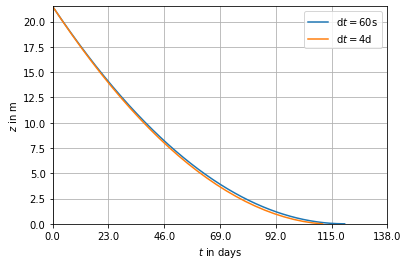

In [7]:
# Definition der Funktion zu Berechnung 
# der Tiefe eines Zylinders mit gegebenem Radius
# anhand des Volumens
def tiefe_zylinder(V):
    return (V/(r0**2*pi))

# Erneurte Berechnung des Ausflusses für die Form eines Zylinders
t_list_min, h_list_min = abfluss(V0, 60, tiefe_zylinder)
t_list_day, h_list_day = abfluss(V0, 60*60*24*4, tiefe_zylinder)

# Plot der x-y Paare, mehrere Plots werden farblich unterschieden übereinander gezeichnet
plot(t_list_min, h_list_min, label='$\mathrm{d}t=60\mathrm{s}$')
plot(t_list_day, h_list_day, label='$\mathrm{d}t=4\mathrm{d}$')
# Formatierung des Plots
grid()
legend()
xlabel('$t$ in days')
ylabel('$z$ in m')
# Grenzen der x-Achse setzen
xlim([0, max(t_list_min[-1], t_list_day[-1])])
# Grenzen der y-Achse setzen, Null abschneiden, um Fehler durch grobe Zeitschritte auszublenden
ylim([0, h_list_min[0]])
# Beschriftung der x-Achse in Tage umrechnen
xlocs, xlabels = xticks()
xticks(xlocs, xlocs//(60*60*24))

show()